In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

bitcoin_market_info = pd.read_csv("combined.csv")
bitcoin_market_info.head()
model_data = bitcoin_market_info


plt.plot(model_data['price'])

In [2]:
split_date = '2017-06-01'
training_set, test_set = model_data[model_data['date']<split_date], model_data[model_data['date']>=split_date]
print(test_set)
training_set = training_set.drop('date', 1)
training_set = training_set.drop('day', 1)
test_set = test_set.drop('date', 1)
test_set = test_set.drop('day', 1)


                      day        price        date    difficulty  recipients  \
1533  2017-06-02 00:00:00  2446.142414  2017-06-02  5.959219e+11      534554   
1534  2017-06-04 00:00:00  2516.173143  2017-06-04  6.283369e+11      537356   
1535  2017-06-06 00:00:00  2883.313697  2017-06-06  6.787601e+11      617583   
1536  2017-06-08 00:00:00  2792.999188  2017-06-08  6.787601e+11      609695   
1537  2017-06-10 00:00:00  2845.372857  2017-06-10  6.787601e+11      516452   
1538  2017-06-12 00:00:00  2657.675062  2017-06-12  6.787601e+11      538616   
1539  2017-06-14 00:00:00  2447.041563  2017-06-14  6.787601e+11      565818   
1540  2017-06-16 00:00:00  2464.959814  2017-06-16  6.787601e+11      536159   
1541  2017-06-18 00:00:00  2507.389252  2017-06-18  7.116972e+11      433220   
1542  2017-06-20 00:00:00  2754.978250  2017-06-20  7.116972e+11      594316   
1543  2017-06-22 00:00:00  2727.288013  2017-06-22  7.116972e+11      534171   
1544  2017-06-24 00:00:00  2589.164888  

In [3]:
print(training_set)

            price    difficulty  recipients  num_tranc
0        0.000000  1.000000e+00           0       14.0
1        0.000000  1.000000e+00           0      106.0
2        0.000000  1.000000e+00           0      116.0
3        0.000000  1.000000e+00           0      136.0
4        0.000000  1.000000e+00           0      109.0
5        0.000000  1.000000e+00           1      120.0
6        0.000000  1.000000e+00           0      115.0
7        0.000000  1.000000e+00           1       68.0
8        0.000000  1.000000e+00           0      195.0
9        0.000000  1.000000e+00           0      105.0
10       0.000000  1.000000e+00           1      122.0
11       0.000000  1.000000e+00           1      129.0
12       0.000000  1.000000e+00           1      127.0
13       0.000000  1.000000e+00           0      126.0
14       0.000000  1.000000e+00           0      129.0
15       0.000000  1.000000e+00           1      135.0
16       0.000000  1.000000e+00           0      127.0
17       0

[[-0.72185867 -0.48192994 -0.81347115 -0.83053208]
 [-0.72185867 -0.48192994 -0.81347115 -0.82950548]
 [-0.72185867 -0.48192994 -0.81347115 -0.82939389]
 ...
 [ 5.12949546  4.64711163  3.10396933  2.87304202]
 [ 5.89031924  4.64711163  2.76057031  2.75837517]
 [ 5.91938121  4.64711163  2.87912373  2.75833054]]
223
223


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


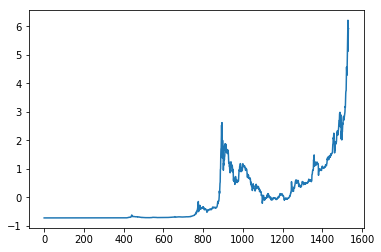

In [4]:
window_len = 10
norm_cols = ["difficulty","price","recipients","num_tranc"]
from sklearn import preprocessing
inputs = preprocessing.scale(training_set)
print(inputs)
inputs = inputs.tolist()
result = []
for i in range(0,1523):
    input_ = []
    #print(input_)
    for p in range(10):
        index = i + 1 + p

        input_.append(inputs[index])
    input_ = np.array(input_)
    result.append(input_) 
    
test_inputs = preprocessing.scale(test_set)
test_inputs = test_inputs.tolist()



test_result = []
for i in range(0,223):
    input_ = []
    #print(input_)
    for p in range(10):
        index = i + 1 + p
        #print(index)
        input_.append(test_inputs[index])
    input_ = np.array(input_)
    #print(input_)
    test_result.append(input_) 

    
    
LSTM_test_outputs = preprocessing.scale(test_set["price"])[10:]

LSTM_training_outputs = preprocessing.scale(training_set["price"])

plt.plot(LSTM_training_outputs)


LSTM_training_outputs  = LSTM_training_outputs[10:]
print(len(test_result))  
print(len(LSTM_test_outputs))    

In [5]:
# LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
# LSTM_training_inputs = np.array(LSTM_training_inputs)


#inputs = [np.array(LSTM_training_input) for LSTM_training_input in inputs]
result = np.array(result)
print(result)

LSTM_training_inputs = result
LSTM_test_inputs = np.array(test_result)

#print(LSTM_training_inputs.shape[1])
# LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
# LSTM_test_inputs = np.array(LSTM_test_inputs)

[[[-0.72185867 -0.48192994 -0.81347115 -0.82950548]
  [-0.72185867 -0.48192994 -0.81347115 -0.82939389]
  [-0.72185867 -0.48192994 -0.81347115 -0.82917072]
  ...
  [-0.72185867 -0.48192994 -0.81347115 -0.82851235]
  [-0.72185867 -0.48192994 -0.81347115 -0.82951664]
  [-0.72185867 -0.48192994 -0.81346514 -0.82932694]]

 [[-0.72185867 -0.48192994 -0.81347115 -0.82939389]
  [-0.72185867 -0.48192994 -0.81347115 -0.82917072]
  [-0.72185867 -0.48192994 -0.81347115 -0.829472  ]
  ...
  [-0.72185867 -0.48192994 -0.81347115 -0.82951664]
  [-0.72185867 -0.48192994 -0.81346514 -0.82932694]
  [-0.72185867 -0.48192994 -0.81346514 -0.82924883]]

 [[-0.72185867 -0.48192994 -0.81347115 -0.82917072]
  [-0.72185867 -0.48192994 -0.81347115 -0.829472  ]
  [-0.72185867 -0.48192994 -0.81346514 -0.82934926]
  ...
  [-0.72185867 -0.48192994 -0.81346514 -0.82932694]
  [-0.72185867 -0.48192994 -0.81346514 -0.82924883]
  [-0.72185867 -0.48192994 -0.81346514 -0.82927115]]

 ...

 [[ 4.27892736  4.01065362  2.9216

In [6]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


In [7]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# model output is next price normalised to 10th previous closing price
#LSTM_training_outputs = (training_set["price"][window_len:].values/training_set["price"][:-window_len].values)-1


# for i in LSTM_training_outputs:
    
# train model on data
# note: eth_history contains information on the training error per epoch
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1,verbose=2, shuffle=True)


#LSTM_test_inputs

Epoch 1/50
 - 23s - loss: 0.1771
Epoch 2/50
 - 23s - loss: 0.1156
Epoch 3/50
 - 24s - loss: 0.1059
Epoch 4/50
 - 23s - loss: 0.0955
Epoch 5/50
 - 22s - loss: 0.0978
Epoch 6/50
 - 22s - loss: 0.0956
Epoch 7/50
 - 22s - loss: 0.0895
Epoch 8/50
 - 23s - loss: 0.0923
Epoch 9/50
 - 21s - loss: 0.0898
Epoch 10/50
 - 21s - loss: 0.0894
Epoch 11/50
 - 21s - loss: 0.0866
Epoch 12/50
 - 21s - loss: 0.0877
Epoch 13/50
 - 21s - loss: 0.0887
Epoch 14/50
 - 21s - loss: 0.0866
Epoch 15/50
 - 21s - loss: 0.0914
Epoch 16/50
 - 21s - loss: 0.0852
Epoch 17/50
 - 21s - loss: 0.0877
Epoch 18/50
 - 22s - loss: 0.0832
Epoch 19/50
 - 21s - loss: 0.0820
Epoch 20/50
 - 21s - loss: 0.0854
Epoch 21/50
 - 21s - loss: 0.0810
Epoch 22/50
 - 21s - loss: 0.0868
Epoch 23/50
 - 21s - loss: 0.0840
Epoch 24/50
 - 22s - loss: 0.0828
Epoch 25/50
 - 22s - loss: 0.0858
Epoch 26/50
 - 21s - loss: 0.0852
Epoch 27/50
 - 21s - loss: 0.0786
Epoch 28/50
 - 21s - loss: 0.0785
Epoch 29/50
 - 21s - loss: 0.0860
Epoch 30/50
 - 21s - lo

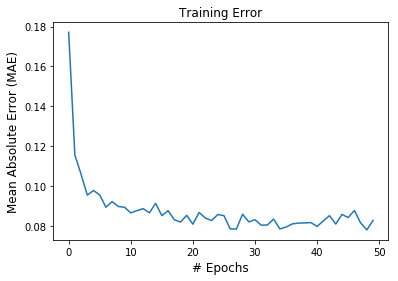

In [8]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(eth_history.epoch, eth_history.history['loss'])
ax1.set_title('Training Error')

if eth_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

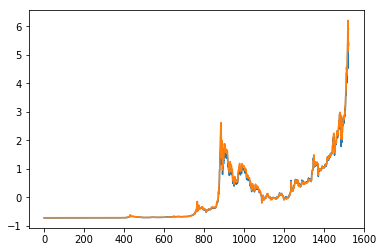

In [9]:
p = eth_model.predict(LSTM_training_inputs)

fig, ax1 = plt.subplots(1,1)
plt.plot(p)
plt.plot(LSTM_training_outputs)

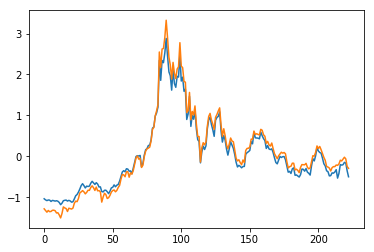

In [10]:
c = eth_model.predict(LSTM_test_inputs)


plt.plot(c)
plt.plot(LSTM_test_outputs)

In [11]:
p = test_set['price'].tolist()
norm_cols = ["difficulty","price","recipients","num_tranc"]
d = test_set['difficulty'].tolist()
r = test_set['recipients'].tolist()
n = test_set['num_tranc'].tolist()
#print(p)
test_inputs = []
for i in range(len(p)):
    test_inputs.append([p[i],d[i],r[i],n[i]])

print(test_inputs)
print(test_set["price"])

[[2446.142414285714, 595921917085.0, 534554, 271539.0], [2516.173142857143, 628336862170.7826, 537356, 266044.0], [2883.3136966371417, 678760110082.0, 617583, 297416.0], [2792.9991875, 678760110082.0, 609695, 307377.0], [2845.372857142857, 678760110082.0, 516452, 254993.0], [2657.6750625, 678760110082.0, 538616, 269098.0], [2447.0415625, 678760110082.0, 565818, 287644.0], [2464.9598142857144, 678760110082.0, 536159, 269937.0], [2507.389252144286, 711697198173.0, 433220, 209359.0], [2754.97825, 711697198173.0, 594316, 269438.0], [2727.2880125, 711697198173.0, 534171, 269685.0], [2589.1648875, 711697198173.0, 469700, 227127.0], [2436.4510571428573, 711697198173.0, 515864, 261906.0], [2585.349185714286, 711697198173.0, 549108, 279811.0], [2477.641375, 711697198173.0, 533362, 267360.0], [2501.191342857143, 708707940675.8989, 409240, 196539.0], [2599.7298375, 708659466230.0, 548372, 255483.0], [2609.96775, 708659466230.0, 459275, 225106.0], [2562.1306625, 708659466230.0, 450997, 220835.0], 

In [44]:
# 
test_inputs = preprocessing.scale(test_set)

test_inputs = test_inputs.tolist()



test_result = []
for i in range(0,223):
    input_ = []
    #print(input_)
    for p in range(10):
        index = i + 1 + p
        #print(index)
        input_.append(test_inputs[index])
    input_ = np.array(input_)
    #print(input_)
    test_result.append(input_) 
tset, test_se = model_data[model_data['date']<split_date], model_data[model_data['date']>=split_date]

temp = test_se['day'].tolist()
dates = []
index = 0
xlabels = []
for i in temp:
    #print(i[5:11])
    
    if index > 15:
        xlabels.append(i[:11])
        index = 0
    dates.append(i[:11])
    xlabels.append('')
    index = index + 1
    
dates = np.array(dates)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


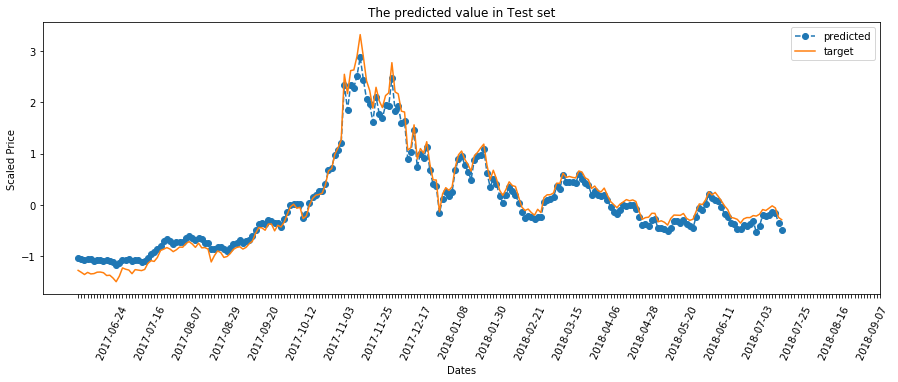

In [32]:
import matplotlib as mpl
import matplotlib.ticker as ticker
LSTM_test_inputs = np.array(test_result)
c = eth_model.predict(LSTM_test_inputs)

c = c.tolist()
p = []
for i in c:
    p.append(i[0])

#plt.plot(dates[:-10],p,label = 'predicted')

tick_spacing = 3
fig1 = plt.figure(figsize=(15,5))
ax = fig1.add_subplot(1,1,1)

# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax.set_xticklabels([datetime.date(2017,i+1,1).strftime('%y %m %d')  for i in range(12)])
plt.xlabel('Dates')
plt.ylabel('Scaled Price')
ax.set_title('The predicted value in Test set')
ax.plot_date(dates[:-10].astype(datetime.datetime),p,label = 'predicted',linestyle='--')
ax.plot(dates[:-10].astype(datetime.datetime),LSTM_test_outputs, label = 'target')
#ax.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels,rotation=65)
plt.legend() 
plt.show()

In [ ]:
print(LSTM_training_inputs[:-5])

[[[-0.72185867 -0.48192994 -0.81347115 -0.82950548]
  [-0.72185867 -0.48192994 -0.81347115 -0.82939389]
  [-0.72185867 -0.48192994 -0.81347115 -0.82917072]
  ...
  [-0.72185867 -0.48192994 -0.81347115 -0.82851235]
  [-0.72185867 -0.48192994 -0.81347115 -0.82951664]
  [-0.72185867 -0.48192994 -0.81346514 -0.82932694]]

 [[-0.72185867 -0.48192994 -0.81347115 -0.82939389]
  [-0.72185867 -0.48192994 -0.81347115 -0.82917072]
  [-0.72185867 -0.48192994 -0.81347115 -0.829472  ]
  ...
  [-0.72185867 -0.48192994 -0.81347115 -0.82951664]
  [-0.72185867 -0.48192994 -0.81346514 -0.82932694]
  [-0.72185867 -0.48192994 -0.81346514 -0.82924883]]

 [[-0.72185867 -0.48192994 -0.81347115 -0.82917072]
  [-0.72185867 -0.48192994 -0.81347115 -0.829472  ]
  [-0.72185867 -0.48192994 -0.81346514 -0.82934926]
  ...
  [-0.72185867 -0.48192994 -0.81346514 -0.82932694]
  [-0.72185867 -0.48192994 -0.81346514 -0.82924883]
  [-0.72185867 -0.48192994 -0.81346514 -0.82927115]]

 ...

 [[ 3.15660691  4.01065362  2.9989

In [33]:

print(LSTM_training_outputs)

[-0.72185867 -0.72185867 -0.72185867 ...  5.12949546  5.89031924
  5.91938121]


In [34]:
LSTM_training_outputs = []
sacle_training_set = preprocessing.scale(training_set["price"])
for i in range(window_len, len(sacle_training_set)-5):
    LSTM_training_outputs.append(sacle_training_set[i:i+5]-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)

In [35]:
print(LSTM_training_outputs)
# LSTM_training_outputs = preprocessing.scale(training_set["price"])

[[-1.72185867 -1.72185867 -1.72185867 -1.72185867 -1.72185867]
 [-1.72185867 -1.72185867 -1.72185867 -1.72185867 -1.72185867]
 [-1.72185867 -1.72185867 -1.72185867 -1.72185867 -1.72185867]
 ...
 [ 3.52936132  3.97687479  4.22386277  4.92454204  5.21360411]
 [ 3.97687479  4.22386277  4.92454204  5.21360411  4.12949546]
 [ 4.22386277  4.92454204  5.21360411  4.12949546  4.89031924]]


In [36]:
print(len(LSTM_training_outputs))
print(len(LSTM_training_inputs[:-5]))
eth_model = build_model(LSTM_training_inputs, output_size=5, neurons = 20)

1518
1518


In [37]:
eth_history = eth_model.fit(LSTM_training_inputs[:-5], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 23s - loss: 0.3150
Epoch 2/50
 - 21s - loss: 0.1915
Epoch 3/50
 - 21s - loss: 0.1588
Epoch 4/50
 - 21s - loss: 0.1475
Epoch 5/50
 - 21s - loss: 0.1375
Epoch 6/50
 - 21s - loss: 0.1309
Epoch 7/50
 - 21s - loss: 0.1264
Epoch 8/50
 - 21s - loss: 0.1179
Epoch 9/50
 - 21s - loss: 0.1182
Epoch 10/50
 - 21s - loss: 0.1170
Epoch 11/50
 - 21s - loss: 0.1116
Epoch 12/50
 - 21s - loss: 0.1122
Epoch 13/50
 - 21s - loss: 0.1092
Epoch 14/50
 - 21s - loss: 0.1077
Epoch 15/50
 - 21s - loss: 0.1056
Epoch 16/50
 - 21s - loss: 0.1039
Epoch 17/50
 - 21s - loss: 0.1016
Epoch 18/50
 - 21s - loss: 0.1053
Epoch 19/50
 - 21s - loss: 0.0976
Epoch 20/50
 - 21s - loss: 0.1013
Epoch 21/50
 - 21s - loss: 0.1029
Epoch 22/50
 - 21s - loss: 0.0933
Epoch 23/50
 - 22s - loss: 0.0972
Epoch 24/50
 - 21s - loss: 0.1011
Epoch 25/50
 - 21s - loss: 0.1029
Epoch 26/50
 - 21s - loss: 0.0975
Epoch 27/50
 - 21s - loss: 0.0984
Epoch 28/50
 - 23s - loss: 0.0981
Epoch 29/50
 - 21s - loss: 0.0921
Epoch 30/50
 - 21s - lo

In [39]:
pred_range = 5
# little bit of reformatting the predictions to closing prices
# eth_pred_prices = ((eth_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1))


LSTM_test_outputs = []
sacle_test_set = preprocessing.scale(test_set["price"])
for i in range(window_len, len(sacle_test_set)-5):
    LSTM_test_outputs.append(sacle_test_set[i:i+5]-1)
LSTM_test_outputs = np.array(LSTM_test_outputs)
print(LSTM_test_outputs)



eth_pred_prices = ((eth_model.predict(LSTM_test_inputs)[:-pred_range]))

print(eth_pred_prices)

[[-2.2848209  -2.32326351 -2.36576701 -2.3243255  -2.35430287]
 [-2.32326351 -2.36576701 -2.3243255  -2.35430287 -2.34774841]
 [-2.36576701 -2.3243255  -2.35430287 -2.34774841 -2.32032305]
 ...
 [-1.18656904 -1.09562316 -1.11437575 -1.06753868 -1.02300657]
 [-1.09562316 -1.11437575 -1.06753868 -1.02300657 -1.06416472]
 [-1.11437575 -1.06753868 -1.02300657 -1.06416472 -1.2501571 ]]
[[-1.9857986 -1.9884127 -1.9977357 -2.008851  -2.008109 ]
 [-2.0108738 -2.0136337 -2.0233355 -2.0357666 -2.0350404]
 [-2.0314004 -2.0346553 -2.0450902 -2.058309  -2.0574021]
 ...
 [-1.403114  -1.4017093 -1.4098792 -1.3987703 -1.3962079]
 [-1.2432132 -1.2383051 -1.2426538 -1.2243471 -1.2215958]
 [-1.2209277 -1.2148186 -1.2201569 -1.2018728 -1.1997386]]


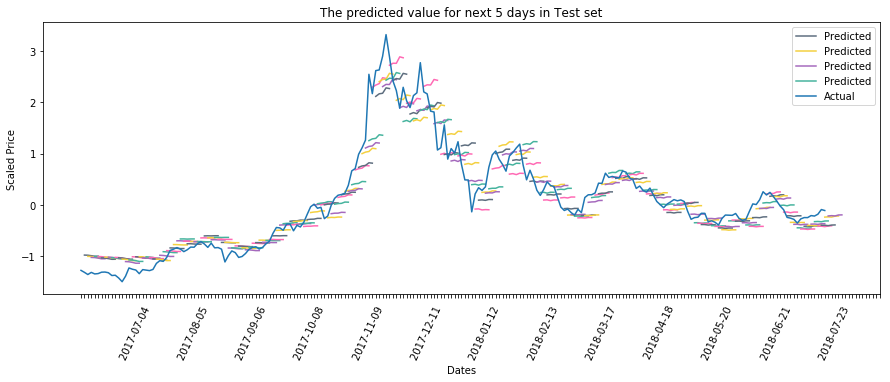

In [45]:
pred_colors = ["#FF69B4", "#5D6D7E", "#F4D03F","#A569BD","#45B39D"]
pred_range = 5
fig1 = plt.figure(figsize=(15,5))
ax = fig1.add_subplot(1,1,1)

# ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
#          test_set['eth_Close'][window_len:], label='Actual')
p = 0

for i in eth_pred_prices:
    # Only adding lines to the legend once
    p = p + 1
    
    if p<5:
        ax.plot([p,p+1, p + 2, p + 3,p + 4],i+1, color=pred_colors[p%5], label="Predicted")
    else: 
        ax.plot([p,p+1, p + 2, p + 3,p + 4],i+1, color=pred_colors[p%5])
    
# ax.set_xticks(range(len(dates[:-10])))
# ax.set_xticklabels(dates[:-10],rotation=65)
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels,rotation=65)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.set_title('The predicted value for next 5 days in Test set')
ax.plot(dates[:-15],sacle_test_set[10:-5], label='Actual')
plt.xlabel('Dates')
plt.ylabel('Scaled Price')
plt.legend() 
plt.show()

In [ ]:
print(len(sacle_test_set[window_len:]))

In [ ]:
print(len(eth_pred_prices))

In [ ]:
print(len(sacle_test_set[10:-5]))

In [ ]:
for rand_seed in range(775,800):
    print(rand_seed)
    np.random.seed(rand_seed)
    temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
    temp_model.fit(LSTM_training_inputs,
                 (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1,
                 epochs=50, batch_size=1, verbose=0, shuffle=True)
    temp_model.save('eth_model_randseed_%d.h5'%rand_seed)
    temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
    temp_model.fit(LSTM_training_inputs,
                 (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1,
                 epochs=50, batch_size=1, verbose=0, shuffle=True)
    temp_model.save('bt_model_randseed_%d.h5'%rand_seed)